Por hacer:

- ~~quizá mejora usando pca en vez de la data cruda~~
- ver si se puede usar cross validation de algun modo
- porbar otras ideas de chatgpt
- probar en todos los otros features
- aplicar lo de los shap values y demás
- porbar método ml 1 a ver si es mejor
- buscar algo mejor que mis barras de error actuales

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.3 MB/s eta 0:00:00


In [ ]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [ ]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/3dc_lut0.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/3dc_mens0.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/3dc_prlif0.csv'

Mounted at /content/drive


In [ ]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
dc_103515_01.nii.gz,4311.3857,289.72790,4181.9062,8125.8340,2070.4424,2253.4768,1090.2253,488.95563,2083.37230,3023.4187,...,281.91830,1071.1412,678.36536,393.38177,744.71045,421.91590,236.11755,462.53677,884.0268,1433.6827
dc_103515_02.nii.gz,3719.1240,220.31439,4475.8022,6230.6900,2867.2603,3160.8315,1658.4710,428.45193,1303.88290,5006.1850,...,853.53030,2285.7790,753.23580,1414.48140,2313.40840,421.78638,338.04800,1789.31930,890.5096,1881.5807
dc_103515_03.nii.gz,3157.4949,308.89877,3622.6570,4461.5703,3833.5032,3224.6777,1969.0227,550.28040,1789.00000,6020.5350,...,2115.50320,3874.9685,840.71620,2221.51900,3544.92500,711.76100,590.08777,2915.28050,811.7012,2360.1128
dc_104820_01.nii.gz,1457.2996,485.72192,1775.7780,1746.6793,1756.8032,1119.6401,1152.2587,337.77160,745.53357,1498.7000,...,4609.40400,3136.5398,550.86170,730.34674,2473.80350,276.69693,323.41556,1277.48110,8335.6930,2503.8223
dc_104820_02.nii.gz,2042.9275,1261.76300,2023.9222,1990.6249,2453.0164,1847.9617,1290.6572,1033.86670,1923.17470,3796.2192,...,2860.91160,2348.0742,933.70740,2050.92000,3219.15720,1821.27770,1659.82620,2828.22270,4743.0000,3268.3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc_809252_02.nii.gz,3783.3284,224.08202,2560.0315,4002.2292,1596.6963,2358.6821,1424.8414,453.39800,1204.31290,2388.4246,...,964.73040,7479.8506,658.96070,1141.86060,3053.32800,556.68360,208.73840,1481.10290,5988.1377,6180.3440
dc_809252_03.nii.gz,4854.2427,110.89876,4058.0706,4326.7065,2662.7715,1641.9869,733.2691,918.18470,2840.33400,3521.7607,...,635.16406,1928.5686,625.15430,405.94485,1237.16360,218.71695,126.04636,538.57460,2459.3218,1738.3029
dc_822244_01.nii.gz,2655.2698,604.53564,2726.4019,2085.2544,3544.3635,3116.2168,1438.7532,528.05835,600.21880,4300.1963,...,1824.30970,6041.8500,1627.03050,2416.36650,4268.54150,990.20700,888.28143,5246.62940,3529.1150,6921.6940


In [ ]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
dc_114823_01.nii.gz,4439.41200,631.89746,2075.07570,3632.27420,2597.78690,2745.48200,1826.5015,1958.13130,9378.7810,10126.4990,...,2653.222000,5332.767600,2527.238800,5835.2466,3445.3513,1836.55270,4950.68700,9822.3570,3522.115000,4017.339800
dc_114823_02.nii.gz,3171.33250,227.67065,2834.25760,6193.50300,4765.57130,5140.69730,2126.4130,1171.92080,4382.3400,4659.0730,...,2541.191400,6227.742700,2340.882000,3680.4932,2715.2610,449.87183,2668.12080,6759.8896,5945.099600,4732.070300
dc_114823_03.nii.gz,3424.99560,158.14566,3088.25460,5168.20800,2418.34280,2554.57740,1590.2275,980.58185,3165.1938,2569.1950,...,3032.008800,7417.395000,1308.238800,2152.2190,1372.2476,313.89987,920.38574,2849.9946,6697.686000,7019.005000
dc_117122_01.nii.gz,1807.74800,398.97095,1602.23270,2102.21730,1149.41430,1543.07010,2652.4353,1270.96290,1752.7485,2619.4875,...,1732.590800,3463.820600,451.202330,1826.3107,2883.2207,701.32574,651.77484,1827.8855,3633.072800,2688.191400
dc_117122_02.nii.gz,1635.26500,659.58777,1191.94030,1140.00600,1922.50500,3054.15300,2957.5588,1470.31030,3209.8196,4630.3180,...,744.919000,1717.080800,472.882100,2284.7190,3825.2278,953.35780,1108.01160,3299.0610,2973.559300,1770.976000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc_861456_02.nii.gz,216.98720,180.51431,260.44290,898.38000,197.81505,896.49420,3132.2896,703.22780,2433.4414,6269.9260,...,412.279800,8495.307000,231.193590,4471.8930,5135.7500,733.61680,2203.83100,5786.5933,12072.625000,6228.116000
dc_861456_03.nii.gz,287.54343,215.82272,572.78580,314.02277,1009.14510,394.88873,3126.6848,436.93802,1337.3301,3931.7617,...,180.755620,6448.381300,34.391556,4735.5986,6905.8020,407.31240,2409.98680,5975.0146,11594.299000,7576.208500
dc_902242_01.nii.gz,2575.83330,8660.57000,933.00550,9179.78000,11189.92500,11904.36800,4420.6020,3321.69780,10411.5700,5964.3535,...,8.635126,10.699889,11153.148000,11055.7290,3568.9750,9450.63200,10367.05300,6294.5747,9.777778,9.822403


In [ ]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
dc_101915_01.nii.gz,4041.0470,698.01450,2498.5474,2953.4788,2826.4350,2958.2080,1782.4794,1436.34620,1545.8579,2929.2034,...,1208.9012,4516.1470,1213.18050,2306.32080,2347.04370,1993.28040,2465.19360,3321.0137,4744.2300,5897.8647
dc_101915_02.nii.gz,1085.9310,597.05770,1161.0862,1621.4827,921.8033,1622.8641,4014.3618,218.64827,602.2495,4782.0557,...,1996.4288,5263.0480,313.89374,3720.03700,3849.42460,696.65424,2699.42870,3563.6555,4850.2490,5959.0390
dc_101915_03.nii.gz,1112.0831,531.84534,989.4498,1260.9176,1532.6111,1248.8512,3945.5088,388.91064,531.2668,3720.8137,...,1898.5800,9771.5930,449.97090,3074.94580,4092.57900,693.34980,3442.05470,5115.6060,5009.3180,9067.5080
dc_128632_01.nii.gz,2997.4517,529.37420,4837.3160,4397.1400,1851.7942,2429.8787,3374.0977,922.74570,313.0595,2360.6575,...,4792.2793,5433.3804,2407.71310,1993.44230,2498.74340,1302.32980,1728.68710,4346.4170,5347.1724,3512.6045
dc_128632_02.nii.gz,1524.8641,390.51430,4597.4253,3285.9878,950.4606,1798.2804,4595.2470,395.60092,77.0595,2028.9858,...,2847.4507,5783.3525,1483.47160,2254.99100,4036.40200,973.79570,1579.16550,3997.8352,4955.8315,3983.7107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc_987983_02.nii.gz,2388.3213,350.19864,3407.4868,3754.9167,2684.2212,5336.8896,3310.4038,343.97876,520.2054,1082.3104,...,2420.9102,3955.1533,2380.12670,1669.72380,1226.81860,849.70360,595.31790,1176.6072,3732.8352,4627.1396
dc_987983_03.nii.gz,2501.9841,309.67150,2969.7840,3118.5234,1771.3617,3961.0447,3113.4785,276.26428,664.3570,1317.2083,...,3374.1812,6122.3970,1548.16880,1906.38490,970.02860,1042.68360,323.28146,1165.3098,3623.1763,5158.8804
dc_993675_01.nii.gz,2505.0745,303.75137,2577.8286,3897.3950,2568.1885,2136.3691,2060.7430,1325.11570,2600.5835,2419.9602,...,1277.4915,8582.2100,546.44977,735.16595,1015.84094,389.08545,563.72186,1185.1366,2599.8083,7281.6250


In [ ]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'


# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = 'menstrual'
data_pr['group'] = 'proliferativo'
data_lut['group'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 69 muestras


In [ ]:
print(X_train, y_train)
print(X_test, y_test)

         ROI_1       ROI_2      ROI_3      ROI_4      ROI_5      ROI_6  \
0    4439.4120   631.89746  2075.0757  3632.2742  2597.7869  2745.4820   
1    3171.3325   227.67065  2834.2576  6193.5030  4765.5713  5140.6973   
2    3424.9956   158.14566  3088.2546  5168.2080  2418.3428  2554.5774   
3    1807.7480   398.97095  1602.2327  2102.2173  1149.4143  1543.0701   
4    1635.2650   659.58777  1191.9403  1140.0060  1922.5050  3054.1530   
..         ...         ...        ...        ...        ...        ...   
208  2242.3940  1579.20000  2494.4763  3345.2314  3479.9355  2633.0579   
209  3097.9575  1342.23020  3297.1785  3031.4841  3172.1840  2475.1490   
210  2573.9167   845.55316  3095.7812  3233.2470  1371.4569  3015.4639   
211  3001.9410  1080.69540  2790.1320  3803.2163  3707.4197  5837.5340   
212  2775.2227   581.23410  2512.3228  2654.5676  2054.5513  2368.4675   

         ROI_7       ROI_8       ROI_9      ROI_10  ...      ROI_39  \
0    1826.5015  1958.13130  9378.78100  

# Falta colocar el label de la data, no parece haber funcionado lo anterior para el gráfico siguiente:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 1.55795543 -0.16821414 -0.49576118 ...  3.48721875 -0.53143886
  -0.13655973]
 [ 0.47343447 -0.71217808  0.10990605 ...  1.93547866  0.18885808
   0.2457495 ]
 [ 0.69037903 -0.80573716  0.31254215 ... -0.04564963  0.4125845
   1.46903052]
 ...
 [-0.0375035   0.11930018  0.31854679 ... -0.5528629   1.82923803
   0.90758627]
 [ 0.32856292  0.43572872  0.07470312 ... -0.84545863  0.39455081
   0.31678543]
 [ 0.13466282 -0.23639131 -0.1469301  ... -0.53293571  0.75210069
   0.31386028]]


In [ ]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0    1.557955 -0.168214 -0.495761  0.156366  0.258720  0.106803 -0.646956   
1    0.473434 -0.712178  0.109906  1.687544  1.637569  1.460999 -0.422126   
2    0.690379 -0.805737  0.312542  1.074592  0.144583 -0.001130 -0.824081   
3   -0.692767 -0.481661 -0.872990 -0.758348 -0.662537 -0.573011 -0.027790   
4   -0.840282 -0.130952 -1.200317 -1.333586 -0.170802  0.281318  0.200947   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.321037  1.106561 -0.161168 -0.015237  0.819823  0.043241 -0.229741   
209  0.410681  0.787673  0.479219 -0.202804  0.624074 -0.046037 -0.166348   
210 -0.037504  0.119300  0.318547 -0.082185 -0.521304  0.259444  0.008048   
211  0.328563  0.435729  0.074703  0.258560  0.964518  1.854973  0.353523   
212  0.134663 -0.236391 -0.146930 -0.428136 -0.086812 -0.106352 -0.024766   

           7         8         9   ...        38        39        40  \
0  

In [ ]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0   1.557955 -0.168214 -0.495761  0.156366  0.258720  0.106803 -0.646956   
1   0.473434 -0.712178  0.109906  1.687544  1.637569  1.460999 -0.422126   
2   0.690379 -0.805737  0.312542  1.074592  0.144583 -0.001130 -0.824081   
3  -0.692767 -0.481661 -0.872990 -0.758348 -0.662537 -0.573011 -0.027790   
4  -0.840282 -0.130952 -1.200317 -1.333586 -0.170802  0.281318  0.200947   
..       ...       ...       ...       ...       ...       ...       ...   
58  1.688346  0.602326  0.568266  0.012452  0.183033  0.921697  0.270559   
59  2.412402 -0.557869  1.191560  1.376232  1.362369  0.589186 -0.844341   
60  0.709034 -0.396488 -0.138487 -0.150781  0.075936 -0.451653 -0.930726   
61  1.395400 -0.149443  0.224711 -0.527181 -0.087222 -0.356050 -0.341098   
62  1.354412  0.145548  0.618928  0.766271  0.553974  0.271619 -0.884417   

          7         8         9   ...        38        39       

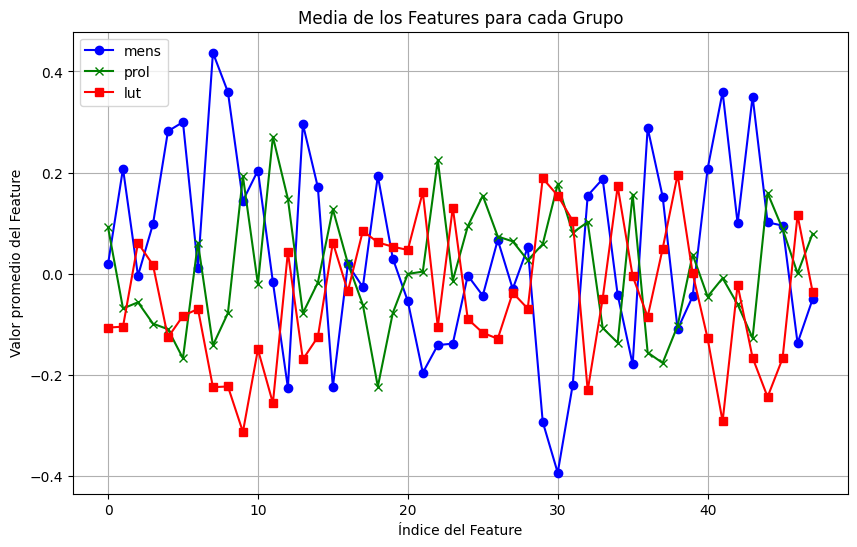

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



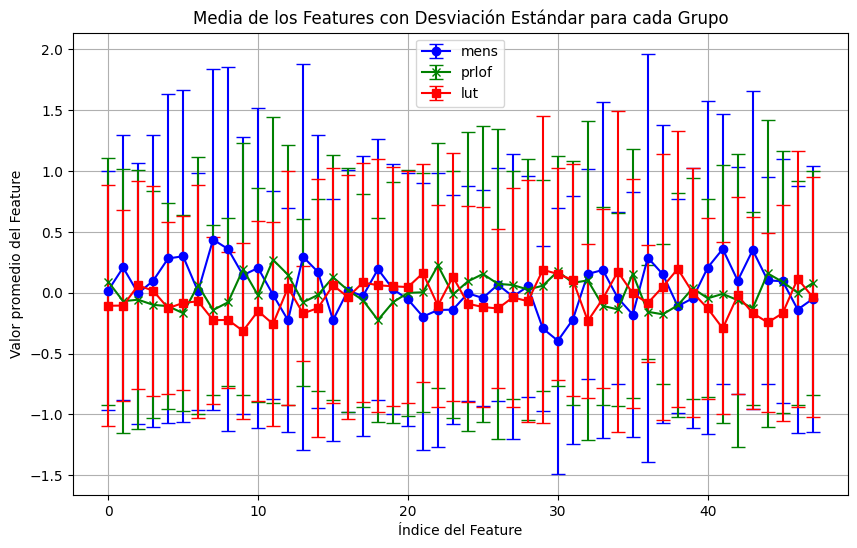

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


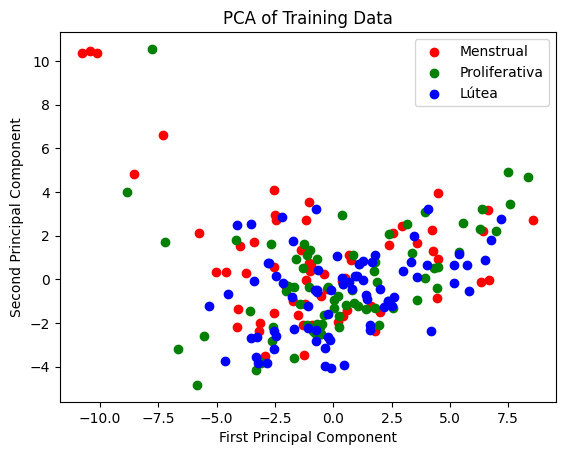

In [ ]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [ ]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.391304347826087

In [ ]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.42028985507246375


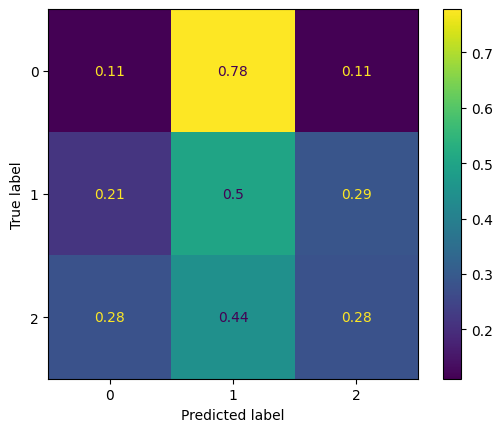

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

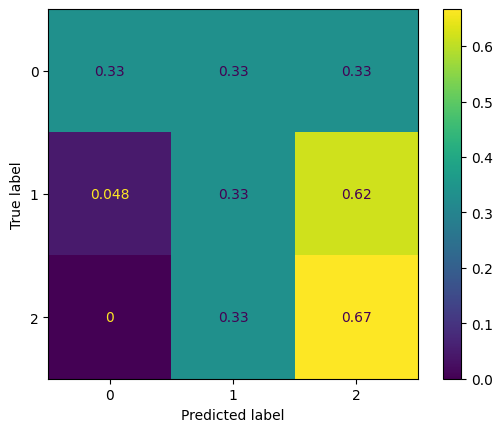

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.3188405797101449


In [ ]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2898550724637681


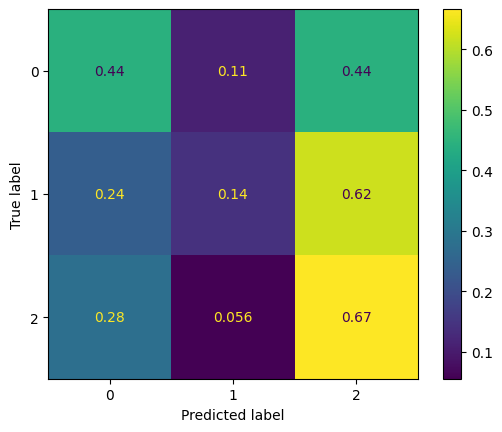

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

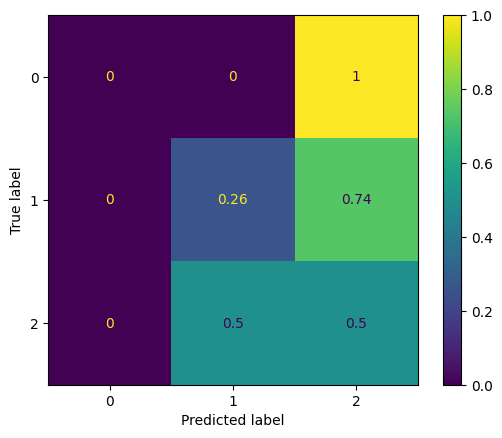

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

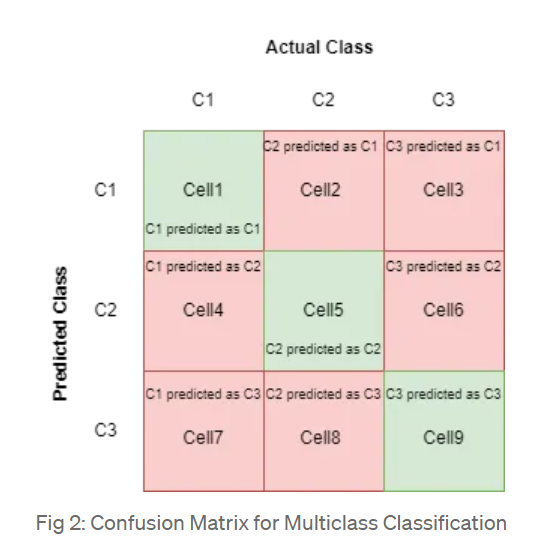

In [45]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [ ]:
print(X, y)

         ROI_1      ROI_2      ROI_3      ROI_4      ROI_5      ROI_6  \
0    4439.4120  631.89746  2075.0757  3632.2742  2597.7869  2745.4820   
1    3171.3325  227.67065  2834.2576  6193.5030  4765.5713  5140.6973   
2    3424.9956  158.14566  3088.2546  5168.2080  2418.3428  2554.5774   
3    1807.7480  398.97095  1602.2327  2102.2173  1149.4143  1543.0701   
4    1635.2650  659.58777  1191.9403  1140.0060  1922.5050  3054.1530   
..         ...        ...        ...        ...        ...        ...   
277  3783.3284  224.08202  2560.0315  4002.2292  1596.6963  2358.6821   
278  4854.2427  110.89876  4058.0706  4326.7065  2662.7715  1641.9869   
279  2655.2698  604.53564  2726.4019  2085.2544  3544.3635  3116.2168   
280  4460.1987  636.64716  3266.6082  2180.4421  2503.5747  3193.0007   
281  4164.0840  850.19305  2929.5986  2167.4358  3364.7180  3936.9185   

         ROI_7       ROI_8      ROI_9      ROI_10  ...      ROI_39     ROI_40  \
0    1826.5015  1958.13130  9378.7810  101

         ROI_1      ROI_2      ROI_3      ROI_4      ROI_5      ROI_6  \
0    4439.4120  631.89746  2075.0757  3632.2742  2597.7869  2745.4820   
1    3171.3325  227.67065  2834.2576  6193.5030  4765.5713  5140.6973   
2    3424.9956  158.14566  3088.2546  5168.2080  2418.3428  2554.5774   
6    2805.4290  420.59247  3333.3572  4568.6875  3216.9573  4652.7695   
7    3776.4292  757.07560  5064.3740  6643.0557  2783.2900  4595.8800   
..         ...        ...        ...        ...        ...        ...   
277  3783.3284  224.08202  2560.0315  4002.2292  1596.6963  2358.6821   
278  4854.2427  110.89876  4058.0706  4326.7065  2662.7715  1641.9869   
279  2655.2698  604.53564  2726.4019  2085.2544  3544.3635  3116.2168   
280  4460.1987  636.64716  3266.6082  2180.4421  2503.5747  3193.0007   
281  4164.0840  850.19305  2929.5986  2167.4358  3364.7180  3936.9185   

         ROI_7       ROI_8       ROI_9      ROI_10  ...      ROI_39  \
0    1826.5015  1958.13130  9378.78100  10126.4990  

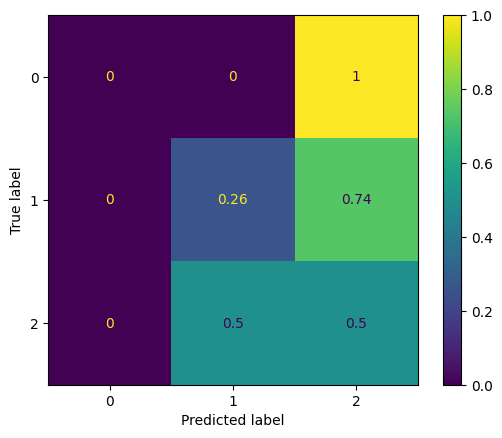

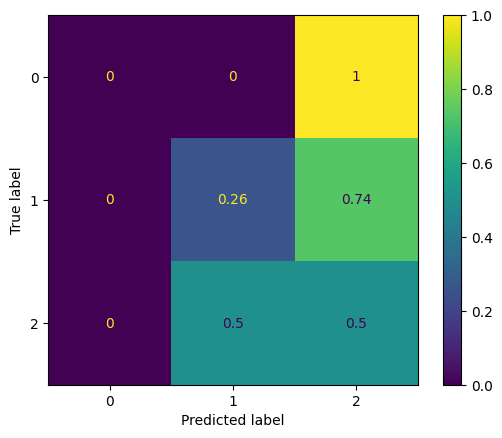

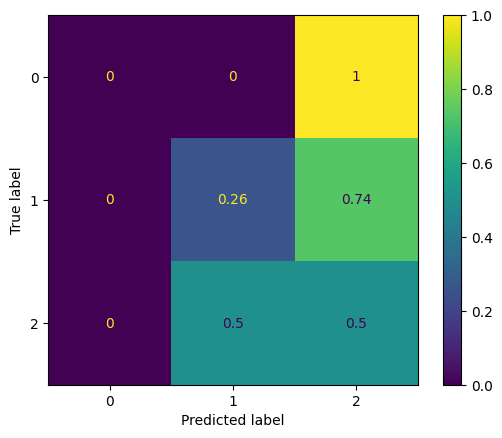

In [46]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    print(X_test2)
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    # Entrenar el modelo
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Random Forest:

Probaremos ahora con otro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

In [ ]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()
